In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

df = pd.read_csv('student-mat.csv', delimiter=';')
print("Dataset size:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nColumn information:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

Dataset size: (395, 33)

First 5 rows:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    o

Distribution of categories:
G3_category
Pass         165
Fail         130
Good          76
Excellent     24
Name: count, dtype: int64

Proportions:
G3_category
Pass         0.417722
Fail         0.329114
Good         0.192405
Excellent    0.060759
Name: proportion, dtype: float64


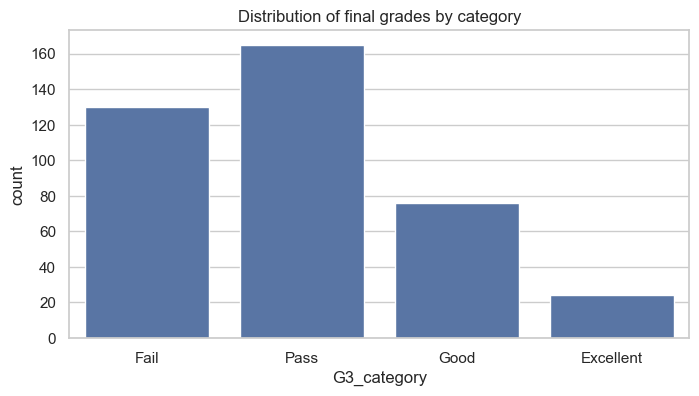

In [97]:
# We create 4 categories
df['G3_category'] = pd.cut(
    df['G3'],
    bins=[-1, 9, 13, 16, 20],
    labels=['Fail', 'Pass', 'Good', 'Excellent']
)

# Distribution of categories
print("Distribution of categories:")
print(df['G3_category'].value_counts())
print("\nProportions:")
print(df['G3_category'].value_counts(normalize=True))

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='G3_category', order=['Fail', 'Pass', 'Good', 'Excellent'])
plt.title('Distribution of final grades by category')
plt.show()

In [98]:
# Signs (without targets and without intermediate estimates)
X = df.drop(['G3', 'G3_category', 'G1', 'G2'], axis=1)
y = df['G3_category']

print("Signs (X):", X.shape)
print("Spruce (y):", y.shape)
print("Links to X:")
print(X.columns.tolist())

Signs (X): (395, 30)
Spruce (y): (395,)
Links to X:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [99]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical features:", len(num_cols))
print(num_cols)
print("\nCategorical features:", len(cat_cols))
print(cat_cols)

Numerical features: 13
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Categorical features: 17
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


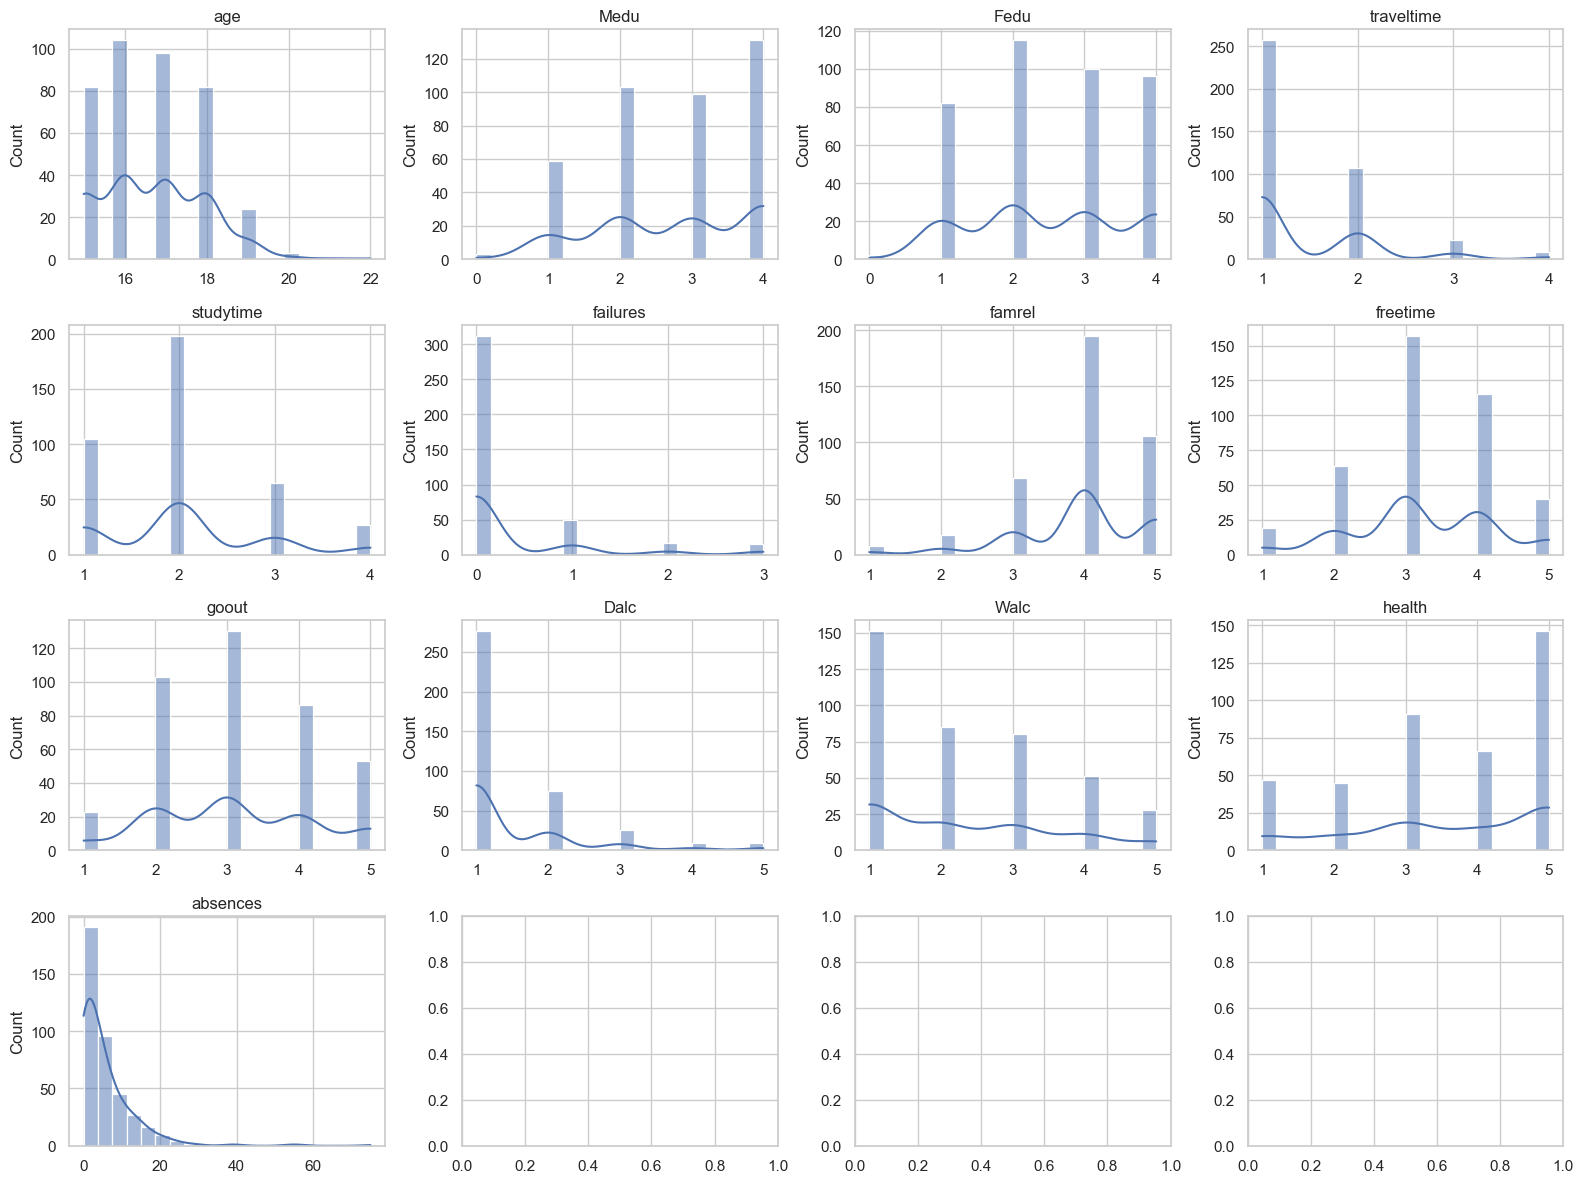

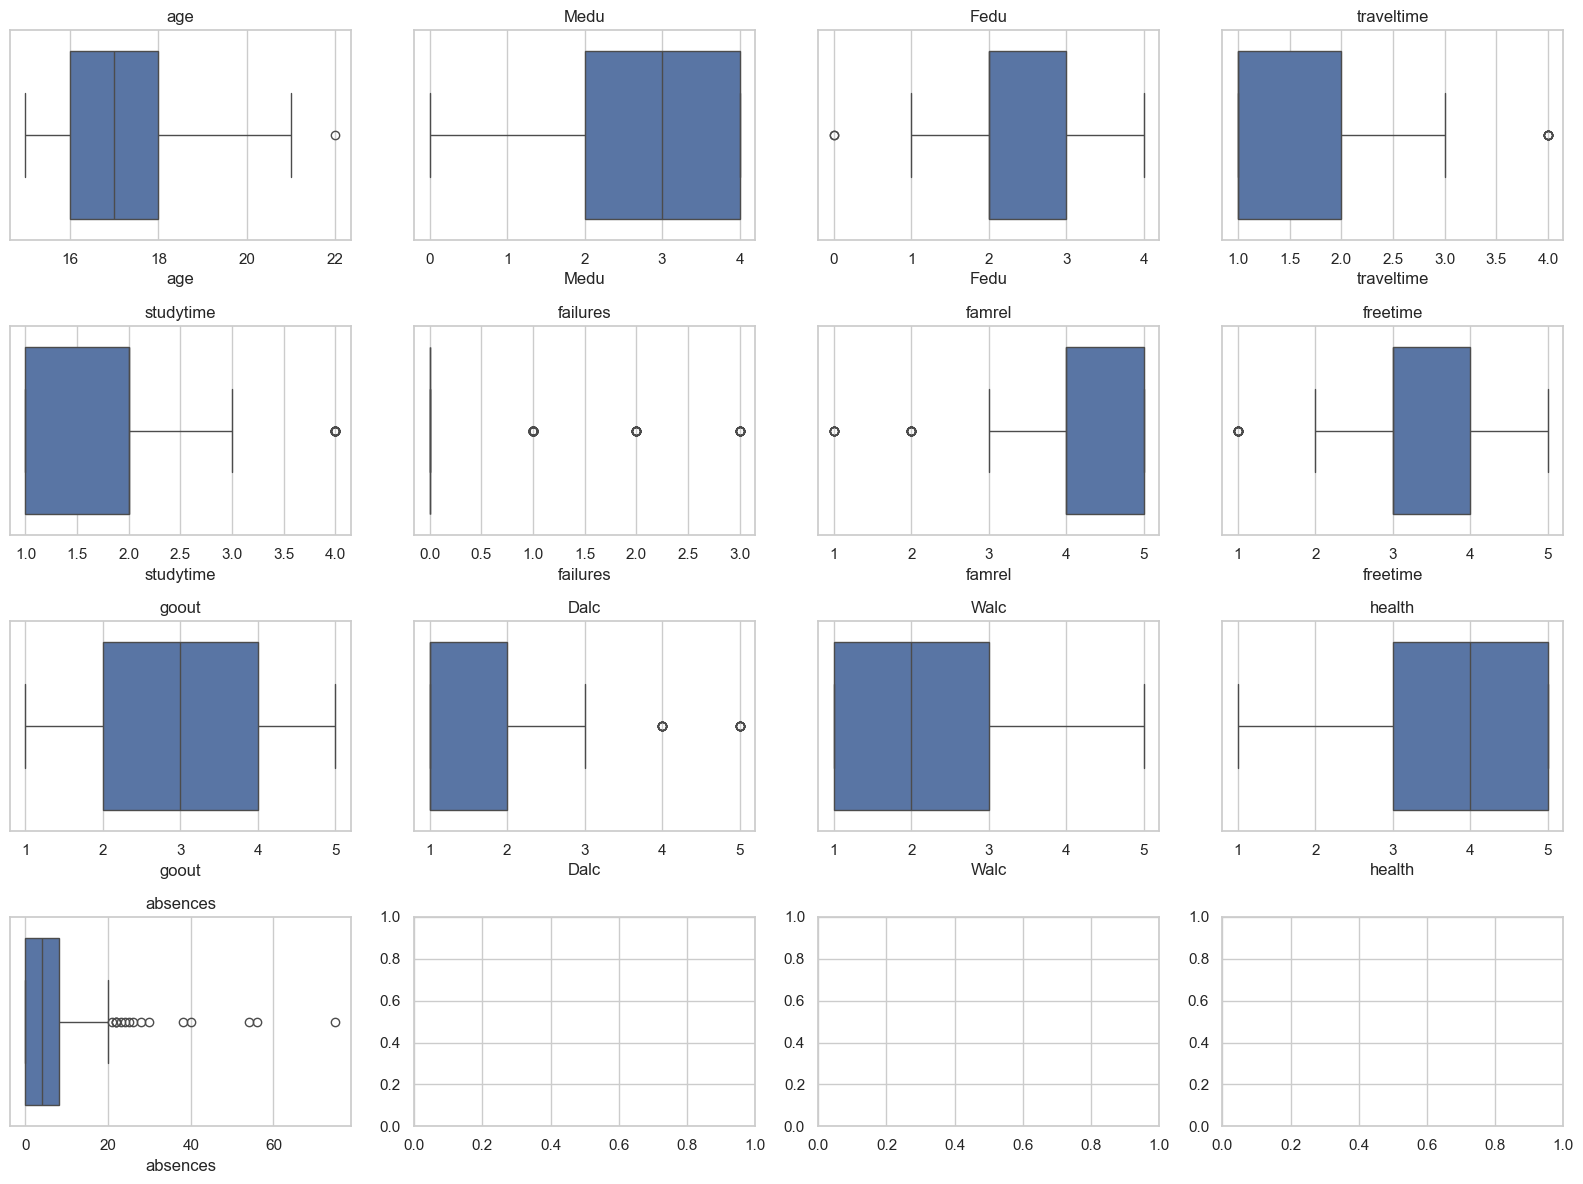

In [100]:
# Histograms for num features
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if i < len(axes):
        sns.histplot(X[col], kde=True, ax=axes[i], bins=20)
        axes[i].set_title(col)
        axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

# Boxplot's for outliers
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if i < len(axes):
        sns.boxplot(x=X[col], ax=axes[i])
        axes[i].set_title(col)

plt.tight_layout()
plt.show()

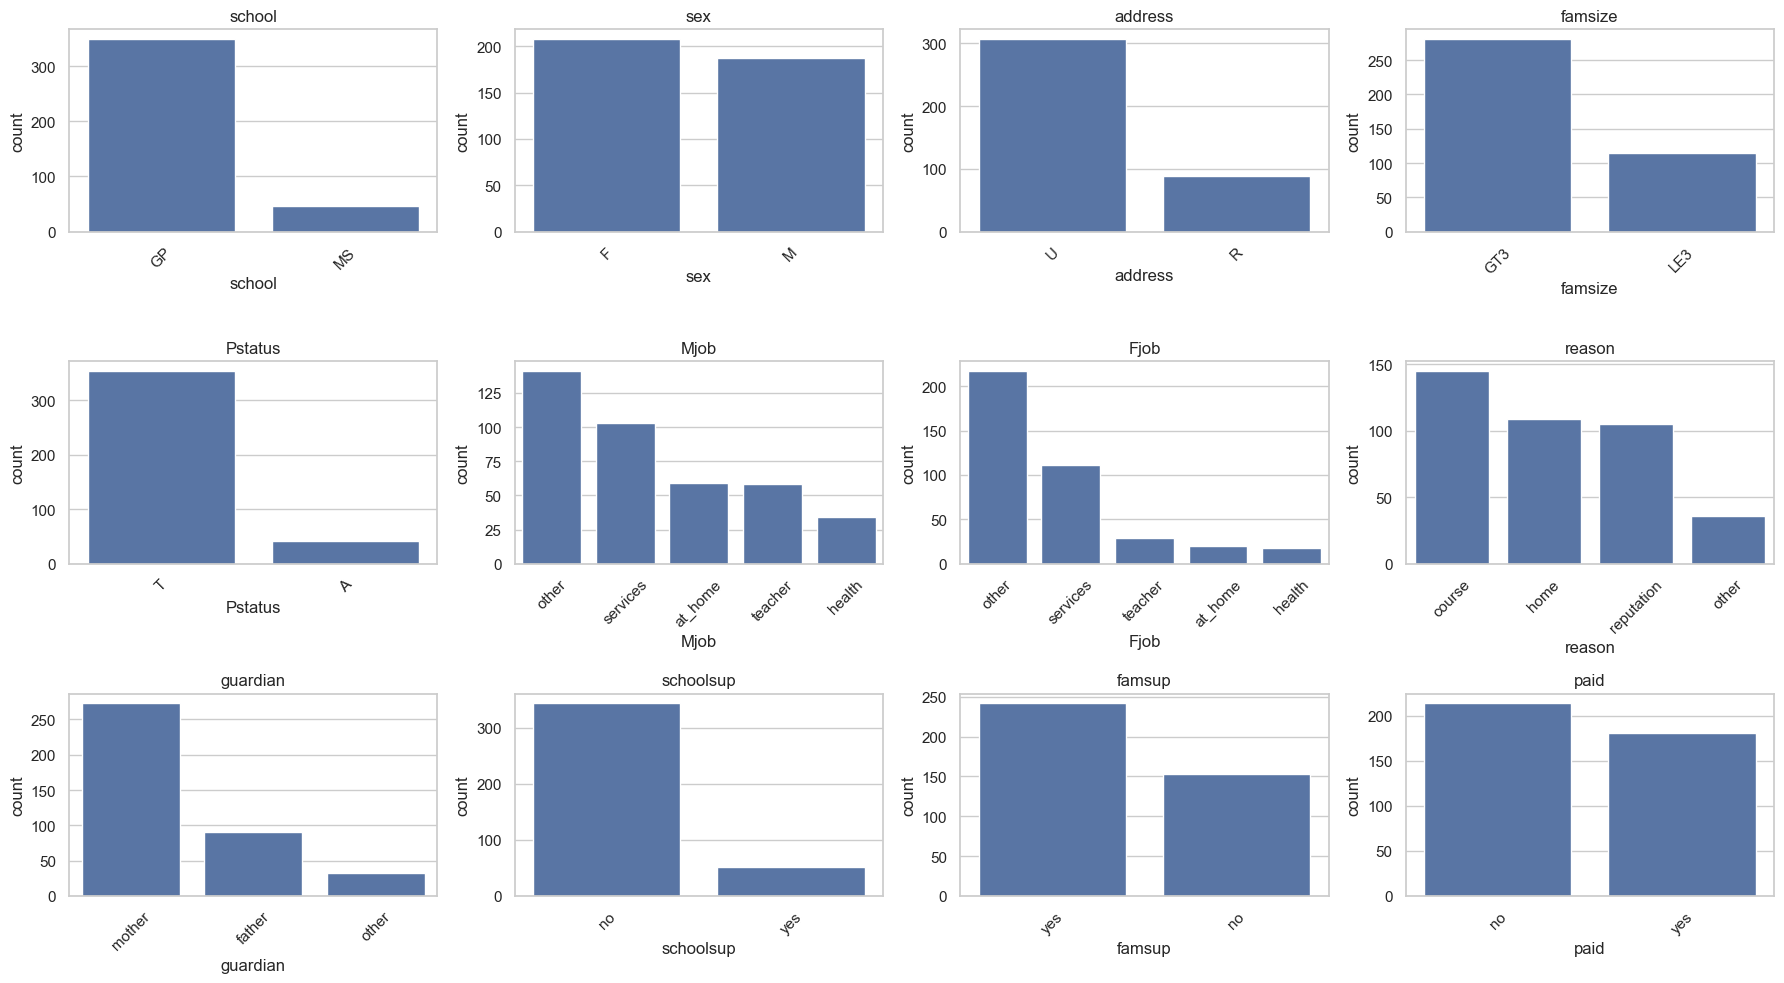

In [101]:
# Distribution according to each categorical feature
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    if i < len(axes):
        sns.countplot(data=X, x=col, ax=axes[i], order=X[col].value_counts().index)
        axes[i].set_title(col)
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

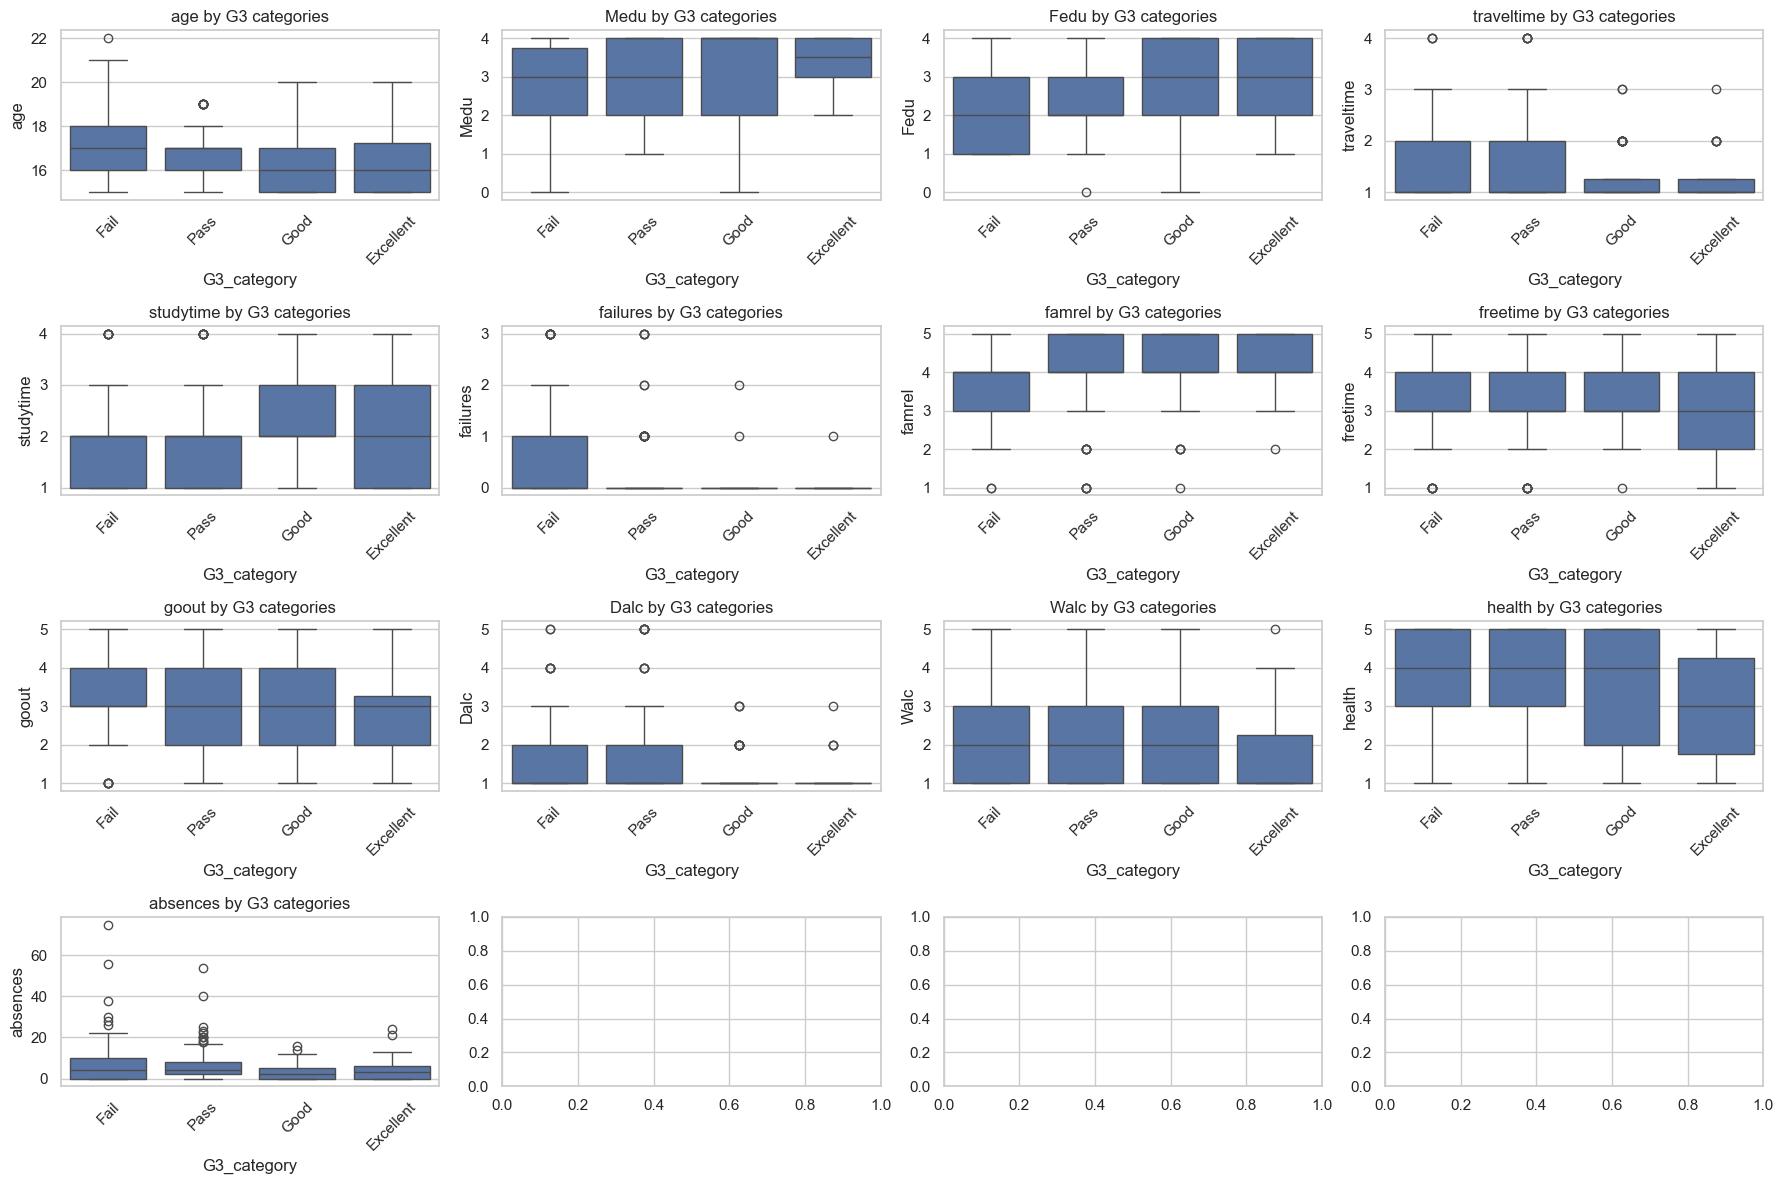

<Figure size 1000x400 with 0 Axes>

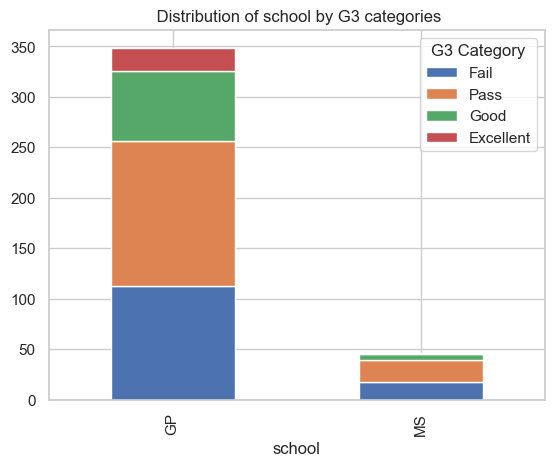

<Figure size 1000x400 with 0 Axes>

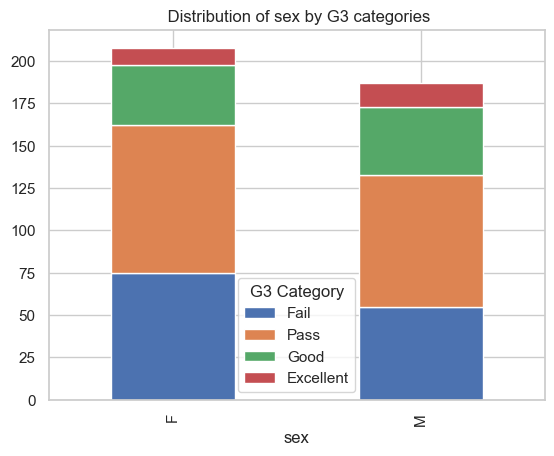

<Figure size 1000x400 with 0 Axes>

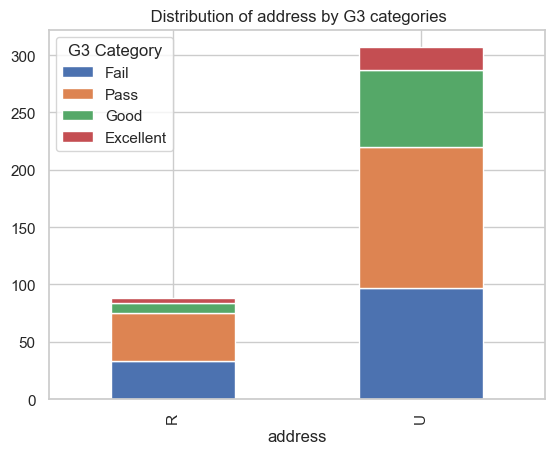

<Figure size 1000x400 with 0 Axes>

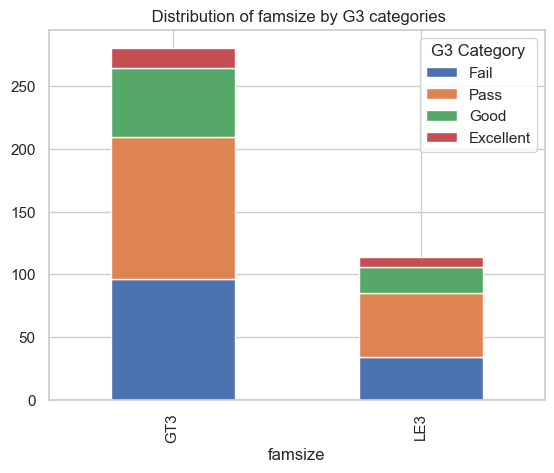

<Figure size 1000x400 with 0 Axes>

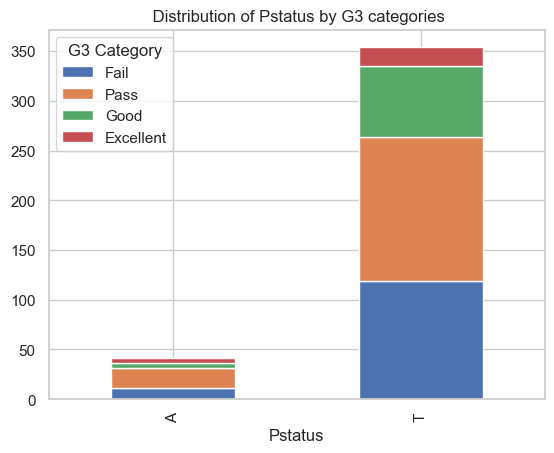

In [102]:
# For numerical ones: boxplot by category
fig, axes = plt.subplots(4, 4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if i < len(axes):
        sns.boxplot(data=df, x='G3_category', y=col, 
                   order=['Fail', 'Pass', 'Good', 'Excellent'], ax=axes[i])
        axes[i].set_title(f'{col} by G3 categories')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# For categorical ones: stacked bar
for col in cat_cols[:5]:  # the first 5 so as not to overload
    plt.figure(figsize=(10,4))
    pd.crosstab(X[col], y).plot(kind='bar', stacked=True)
    plt.title(f' Distribution of {col} by G3 categories')
    plt.legend(title='G3 Category')
    plt.show()

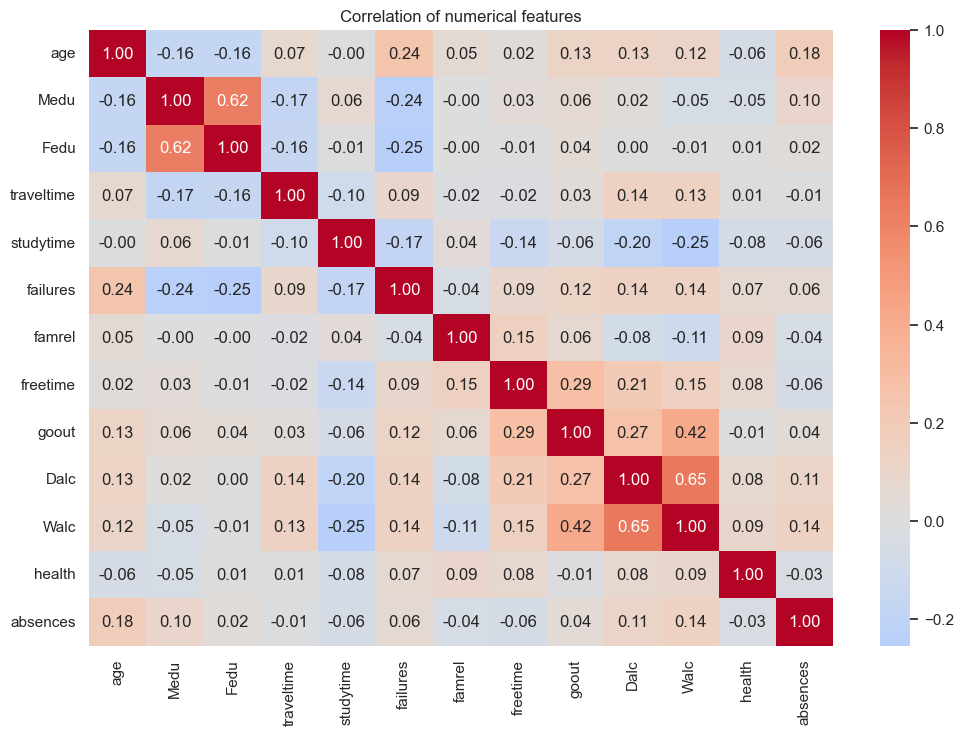

The most correlated pairs:
Dalc      Walc        0.647544
Walc      Dalc        0.647544
Medu      Fedu        0.623455
Fedu      Medu        0.623455
Walc      goout       0.420386
goout     Walc        0.420386
freetime  goout       0.285019
goout     freetime    0.285019
          Dalc        0.266994
Dalc      goout       0.266994
dtype: float64


In [103]:
# The correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = X[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation of numerical features')
plt.show()

# The most correlated pairs (by absolute value)
corr_pairs = corr_matrix.unstack().sort_values(key=abs, ascending=False)
corr_pairs = corr_pairs[corr_pairs != 1.0]  # removing the diagonal
print("The most correlated pairs:")
print(corr_pairs.head(10))

In [104]:
from sklearn.model_selection import train_test_split

# Stratified division (keeping class proportions)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")
print("\nClass allocation in train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of classes in test:")
print(y_test.value_counts(normalize=True))

Train: (316, 30), (316,)
Test: (79, 30), (79,)

Class allocation in train:
G3_category
Pass         0.417722
Fail         0.329114
Good         0.193038
Excellent    0.060127
Name: proportion, dtype: float64

Distribution of classes in test:
G3_category
Pass         0.417722
Fail         0.329114
Good         0.189873
Excellent    0.063291
Name: proportion, dtype: float64


In [105]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Creating transformers for different types of features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Combining it into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough'
)

print("The preprocessing pipeline has been created!")

The preprocessing pipeline has been created!


In [106]:
# We train the transformer on the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# results
print(f"Size of X_train after processing: {X_train_processed.shape}")
print(f"Size of X_test after processing: {X_test_processed.shape}")
print(f"Data type: {type(X_train_processed)}")

# We get the names of the features after OneHot encoding
# This is important for interpreting models
feature_names = []
# Numerical features
feature_names.extend(num_cols)
# Categorical features (after OneHot)
cat_encoder = preprocessor.named_transformers_['cat']['onehot']
for i, col in enumerate(cat_cols):
    categories = cat_encoder.categories_[i][1:]  # skip the first category (drop='first')
    for cat in categories:
        feature_names.append(f"{col}_{cat}")

print(f"\nTotal features after processing: {len(feature_names)}")
print("The first 10 features:", feature_names[:10])

Size of X_train after processing: (316, 39)
Size of X_test after processing: (79, 39)
Data type: <class 'numpy.ndarray'>

Total features after processing: 39
The first 10 features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc']


In [119]:
from sklearn.utils.class_weight import compute_class_weight

# Analyzing class distribution here
class_counts = y_train.value_counts().sort_index()
print("Class distribution in training set:")
print(class_counts)
print("\nClass proportions:")
print(class_counts / len(y_train))

# Custom weights emphasizing what matters most for education
class_weights = {
    'Fail': 2.5,
    'Pass': 1.0,
    'Good': 4.0,      # KEY: Up from 1.5
    'Excellent': 8.0,     # VERY HIGH: Must identify top performers!
}

print("Custom strategic weights:")
for cls, weight in sorted(class_weights.items()):
    count = class_counts[cls]
    print(f"  {cls}: weight={weight:.2f}, count={count}, effective_importance={weight*count:.1f}")

Class distribution in training set:
G3_category
Fail         104
Pass         132
Good          61
Excellent     19
Name: count, dtype: int64

Class proportions:
G3_category
Fail         0.329114
Pass         0.417722
Good         0.193038
Excellent    0.060127
Name: count, dtype: float64
Custom strategic weights:
  Excellent: weight=8.00, count=19, effective_importance=152.0
  Fail: weight=2.50, count=104, effective_importance=260.0
  Good: weight=4.00, count=61, effective_importance=244.0
  Pass: weight=1.00, count=132, effective_importance=132.0


Examples where both models were wrong: 41


,True,Pred_LR,Pred_Tree,Correct_LR,Correct_Tree
227,Pass,Good,Excellent,False,False
300,Pass,Fail,Good,False,False
195,Good,Fail,Excellent,False,False
357,Pass,Fail,Excellent,False,False
335,Good,Excellent,Excellent,False,False



ERROR MATRICES


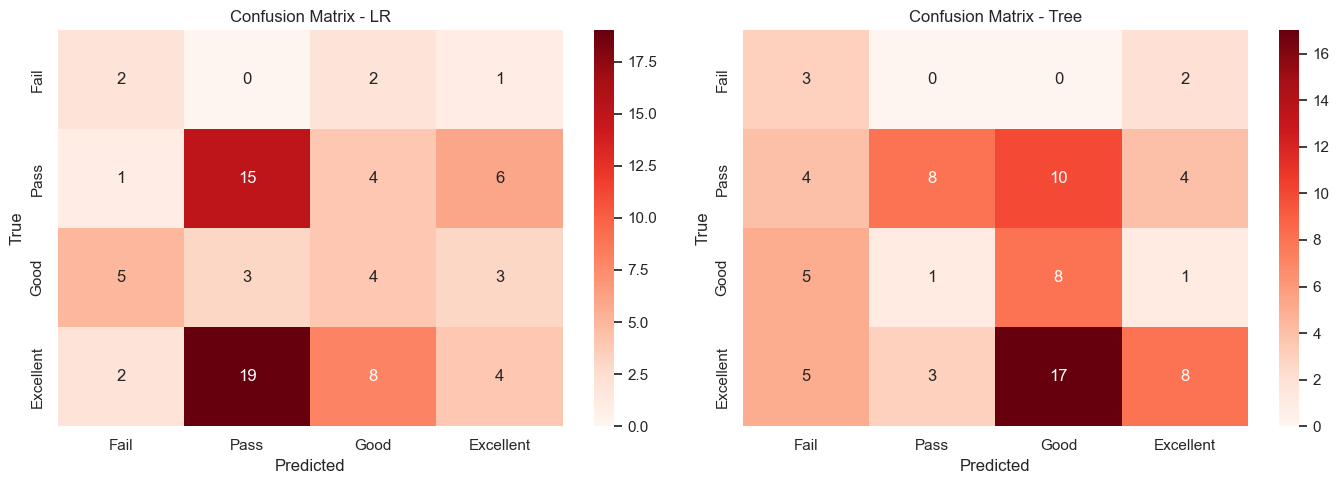

In [126]:
# Let's see which examples of the model predict incorrectly.
errors = pd.DataFrame({
    'True': y_test,
    'Pred_LR': y_test_pred,
    'Pred_Tree': y_test_pred_tree,
    'Correct_LR': y_test == y_test_pred,
    'Correct_Tree': y_test == y_test_pred_tree
})

# Examples where both models were wrong
both_wrong = errors[(~errors['Correct_LR']) & (~errors['Correct_Tree'])]
print(f"Examples where both models were wrong: {len(both_wrong)}")
if len(both_wrong) > 0:
    display(both_wrong.head())

# Analyzing typical errors
print("\nERROR MATRICES")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
for i, (name, pred) in enumerate([('LR', y_test_pred), ('Tree', y_test_pred_tree)]):
    cm = confusion_matrix(y_test, pred)
    cm_df = pd.DataFrame(cm, 
                        index=['Fail', 'Pass', 'Good', 'Excellent'],
                        columns=['Fail', 'Pass', 'Good', 'Excellent'])
    
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Reds', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Creating and training a model
log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced',  # balancing classes
)

log_reg.fit(X_train_processed, y_train)

# Predictions
y_train_pred = log_reg.predict(X_train_processed)
y_test_pred = log_reg.predict(X_test_processed)

# Evaluation
print("LOGISTIC REGRESSION")
print("\nAccuracy on training data:", accuracy_score(y_train, y_train_pred))
print("Accuracy based on test data:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred, 
                           target_names=['Fail', 'Pass', 'Good', 'Excellent']))

LOGISTIC REGRESSION

Accuracy on training data: 0.5379746835443038
Accuracy based on test data: 0.31645569620253167

Classification Report (Test):
              precision    recall  f1-score   support

        Fail       0.20      0.40      0.27         5
        Pass       0.41      0.58      0.48        26
        Good       0.22      0.27      0.24        15
   Excellent       0.29      0.12      0.17        33

    accuracy                           0.32        79
   macro avg       0.28      0.34      0.29        79
weighted avg       0.31      0.32      0.29        79



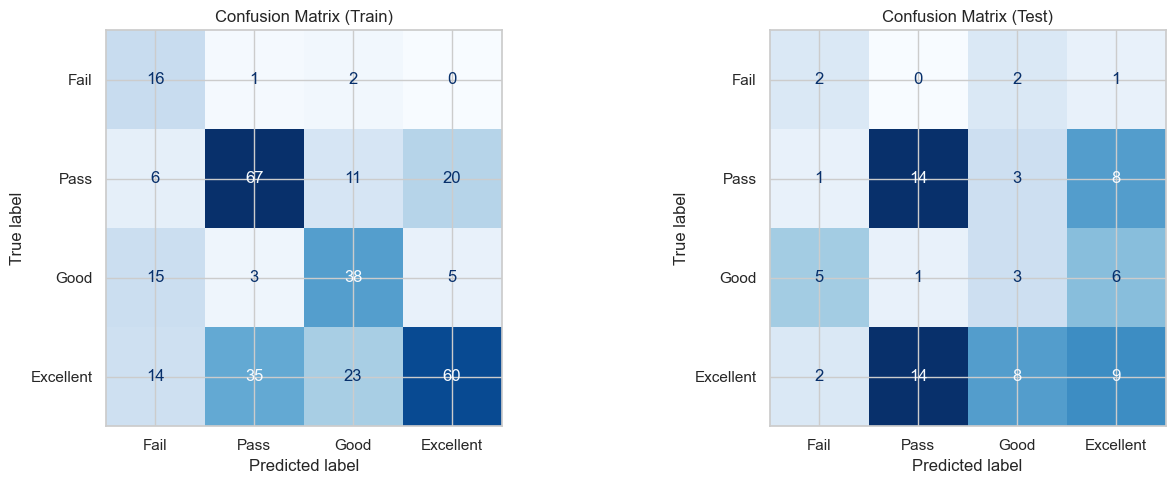

In [109]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Train
ConfusionMatrixDisplay.from_estimator(
    log_reg, X_train_processed, y_train,
    display_labels=['Fail', 'Pass', 'Good', 'Excellent'],
    cmap='Blues', ax=ax1, colorbar=False
)
ax1.set_title('Confusion Matrix (Train)')

# Test
ConfusionMatrixDisplay.from_estimator(
    log_reg, X_test_processed, y_test,
    display_labels=['Fail', 'Pass', 'Good', 'Excellent'],
    cmap='Blues', ax=ax2, colorbar=False
)
ax2.set_title('Confusion Matrix (Test)')

plt.tight_layout()
plt.show()

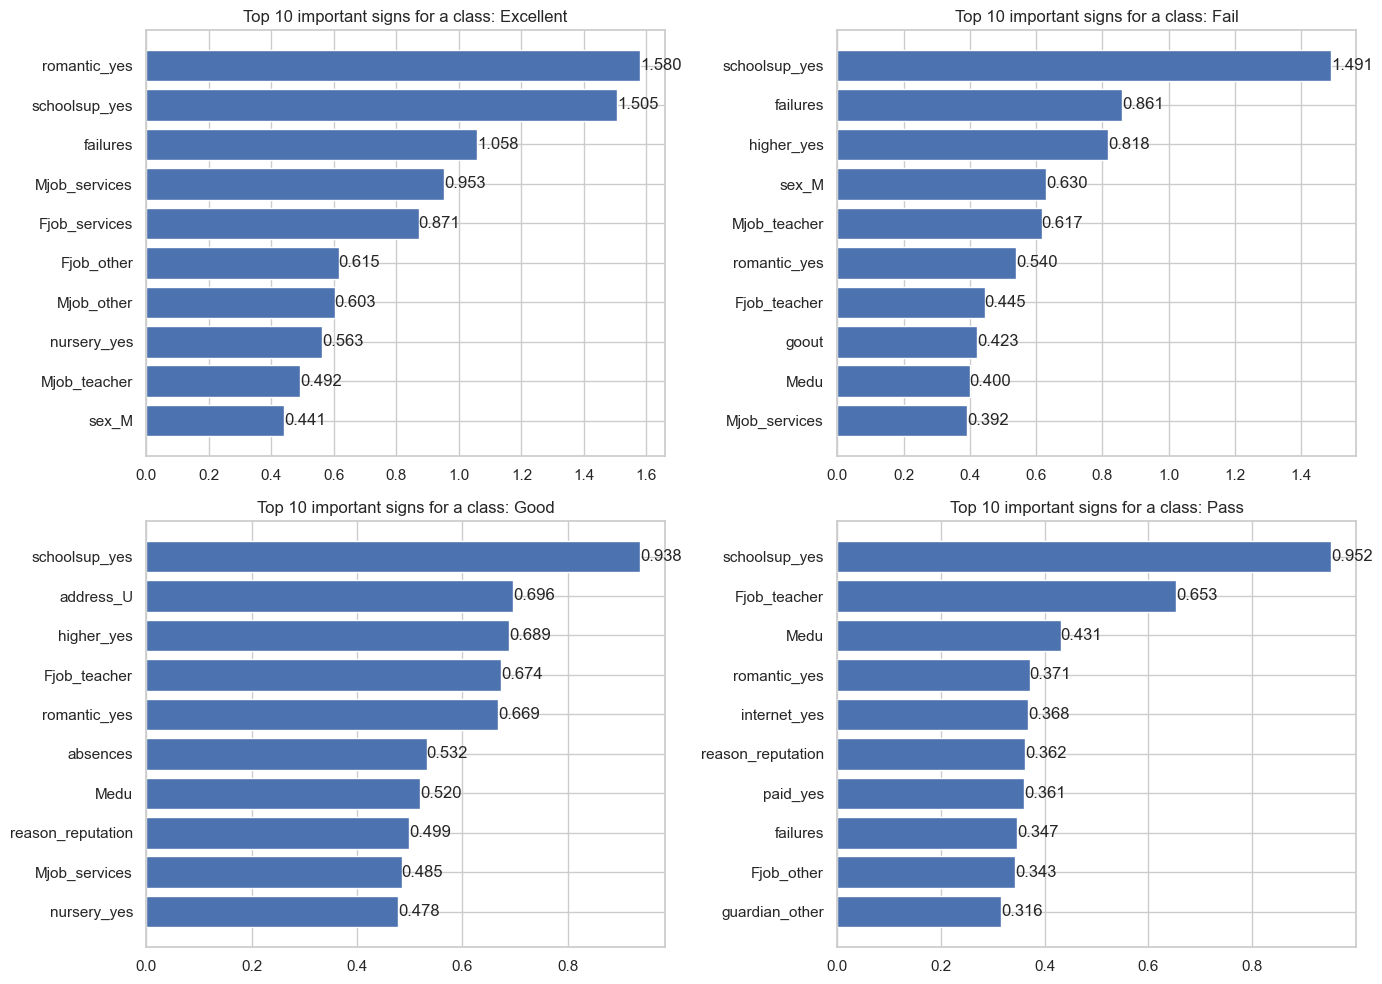

In [110]:
# Coefficients of the model (importance of features)
coefficients = log_reg.coef_

# Creating a DataFrame for clarity
coef_df = pd.DataFrame(
    coefficients.T,
    columns=log_reg.classes_,
    index=feature_names
)

# For each class, we will show the top 10 most important signs.
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, class_name in enumerate(log_reg.classes_):
    # We take the absolute values of the coefficients
    class_coef = coef_df[class_name].abs().sort_values(ascending=False).head(10)
    
    # Visualiazation
    ax = axes[i]
    bars = ax.barh(range(len(class_coef)), class_coef.values)
    ax.set_yticks(range(len(class_coef)))
    ax.set_yticklabels(class_coef.index)
    ax.set_title(f'Top 10 important signs for a class: {class_name}')
    ax.invert_yaxis()  # The most important one is from above PA IDEIII
    
    # Adding values to the bars
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()

In [111]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Creating and training a tree
tree_clf = DecisionTreeClassifier(
    max_depth=5,  # we limit the depth for interpretability
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced',  # balancing classes
)

tree_clf.fit(X_train_processed, y_train)

# Predictions
y_train_pred_tree = tree_clf.predict(X_train_processed)
y_test_pred_tree = tree_clf.predict(X_test_processed)

# Evaluation
print("DECISION TREE")
print("\nAccuracy on training data:", accuracy_score(y_train, y_train_pred_tree))
print("Accuracy on test data:", accuracy_score(y_test, y_test_pred_tree))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred_tree,
                           target_names=['Fail', 'Pass', 'Good', 'Excellent']))

DECISION TREE

Accuracy on training data: 0.47151898734177217
Accuracy on test data: 0.34177215189873417

Classification Report (Test):
              precision    recall  f1-score   support

        Fail       0.18      0.60      0.27         5
        Pass       0.67      0.31      0.42        26
        Good       0.23      0.53      0.32        15
   Excellent       0.53      0.24      0.33        33

    accuracy                           0.34        79
   macro avg       0.40      0.42      0.34        79
weighted avg       0.50      0.34      0.36        79



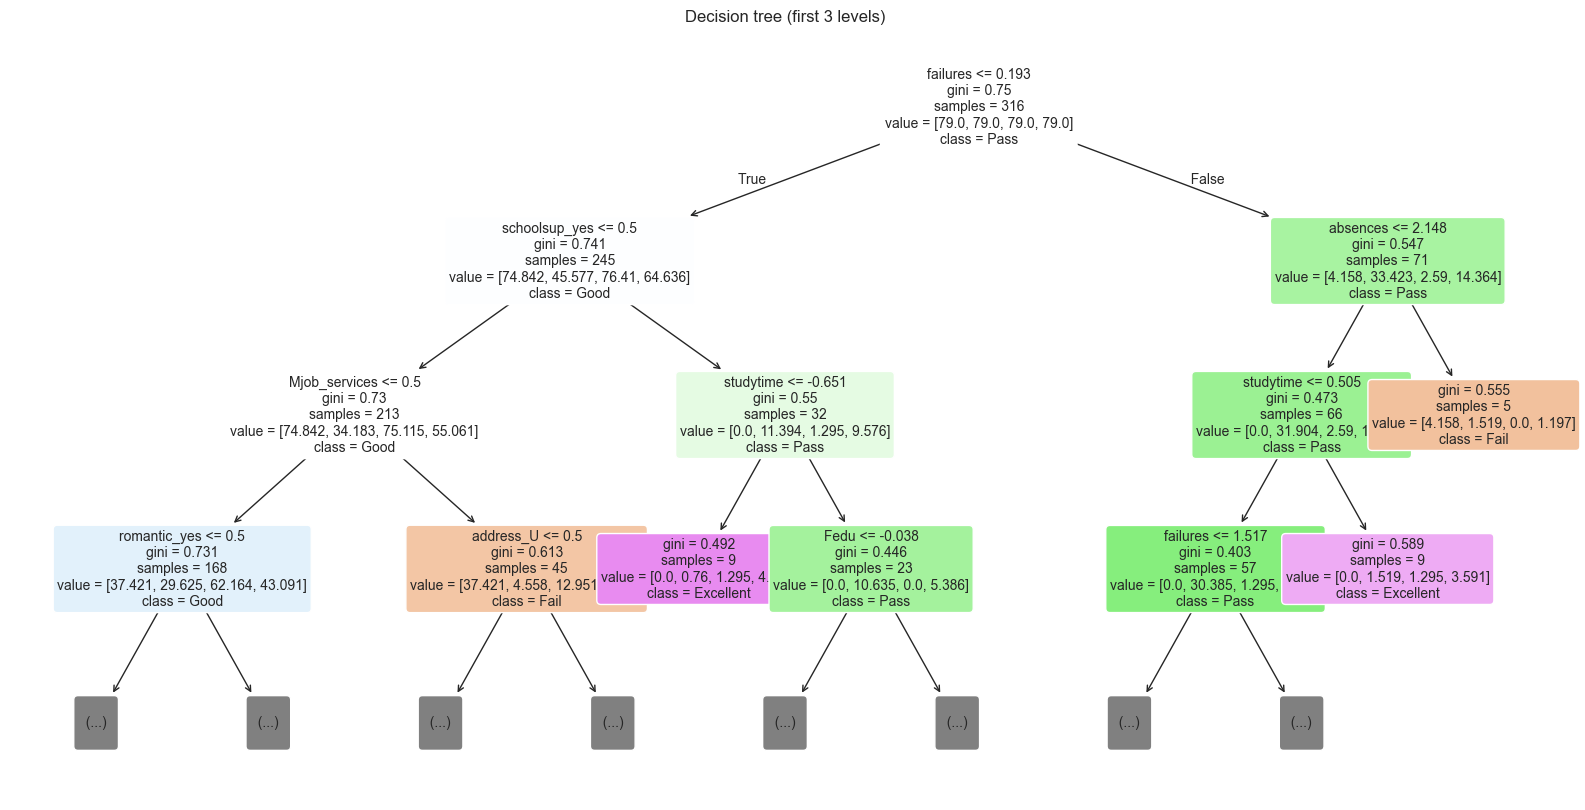

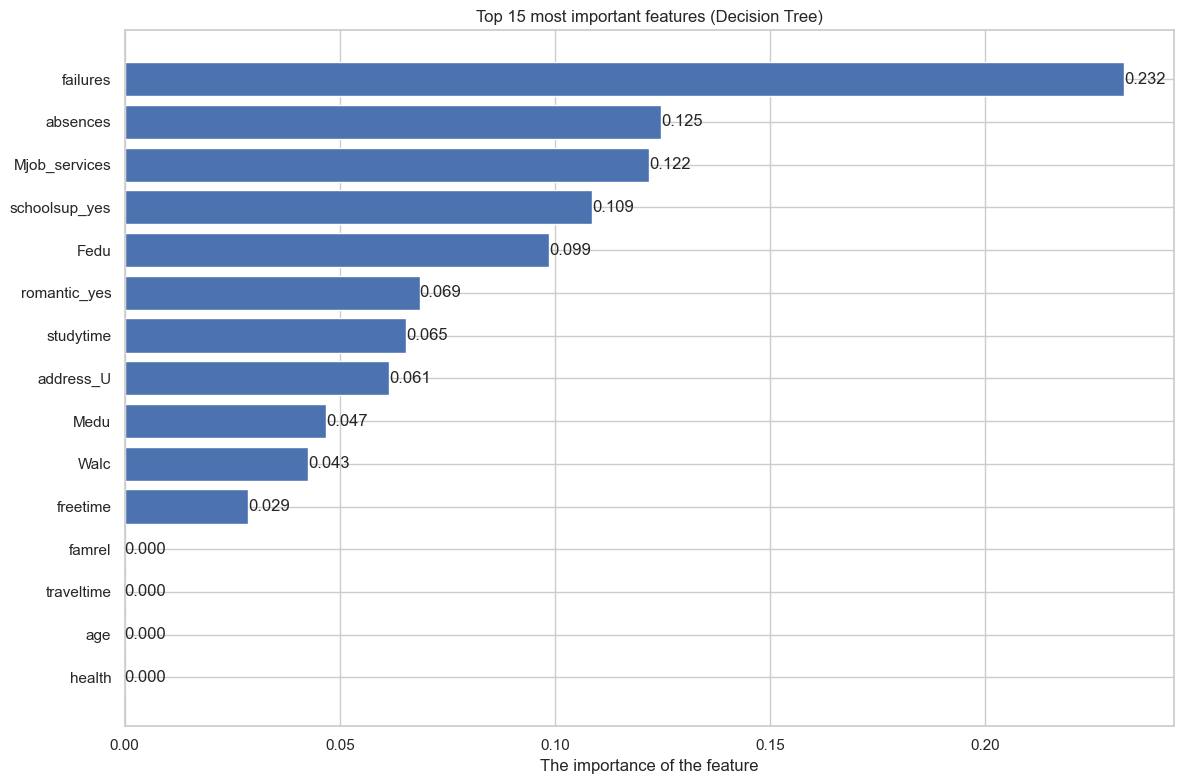

In [112]:
# Visualize the tree (the first 3 levels for readability)
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, 
          feature_names=feature_names,
          class_names=['Fail', 'Pass', 'Good', 'Excellent'],
          filled=True, 
          rounded=True,
          max_depth=3,  # We only show the first 3 levels.
          fontsize=10)
plt.title("Decision tree (first 3 levels)")
plt.show()

# The importance of features in the tree
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': tree_clf.feature_importances_
}).sort_values('importance', ascending=False)

# Top 15 most important FEAutersa
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
bars = plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('The importance of the feature')
plt.title('Top 15 most important features (Decision Tree)')
plt.gca().invert_yaxis()

# Adding values
for i, (bar, imp) in enumerate(zip(bars, top_features['importance'])):
    plt.text(imp, i, f'{imp:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()

MODEL COMPARISON


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.354430,0.363788,0.354430,0.353088
1,Decision Tree,0.341772,0.496763,0.341772,0.355836


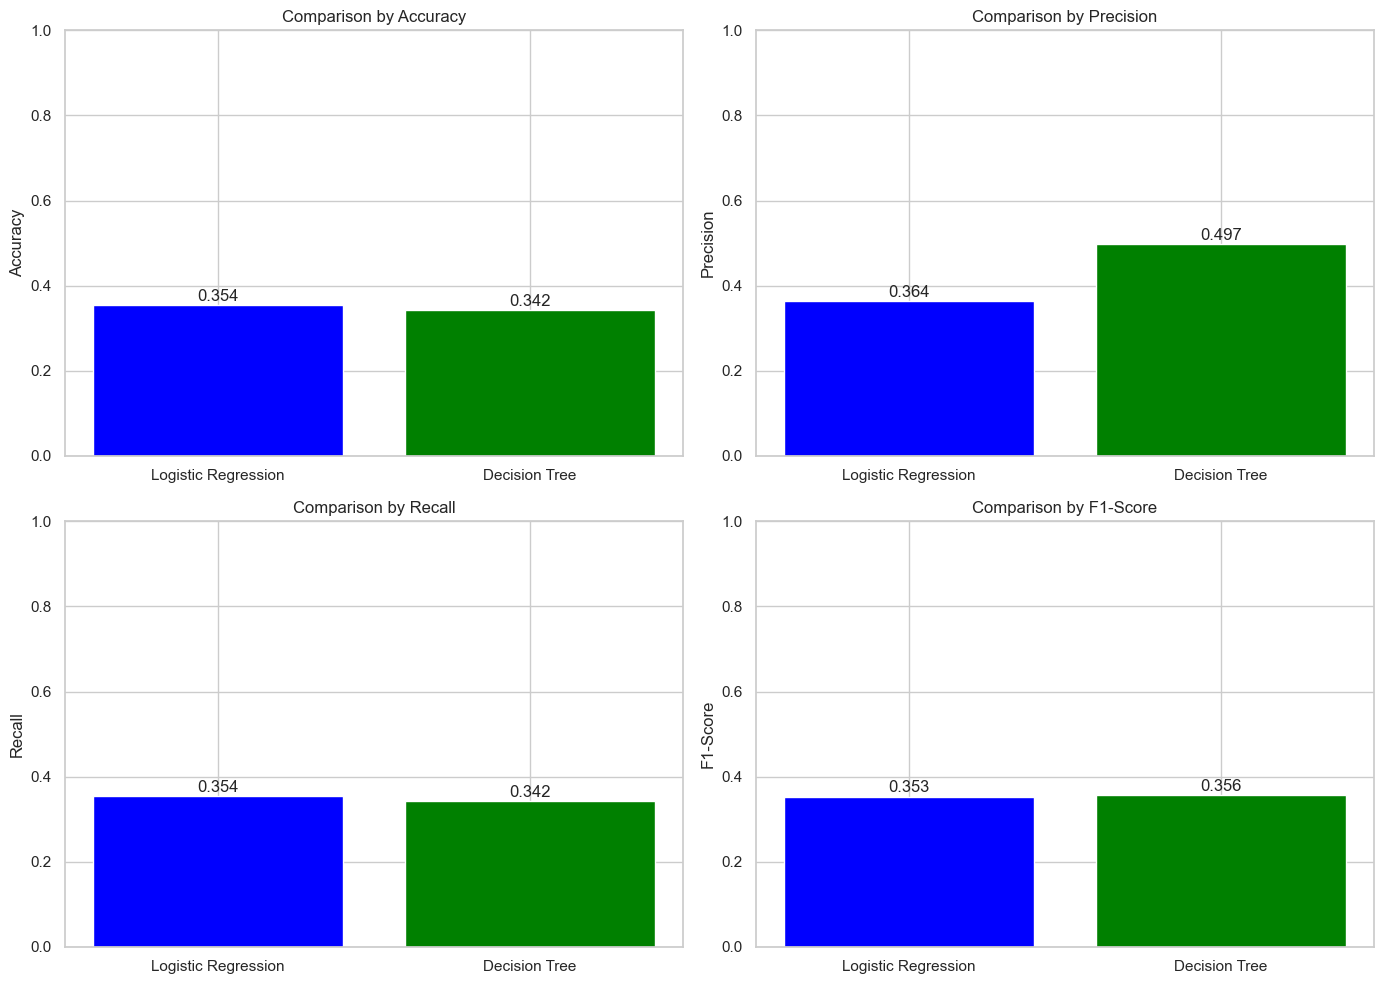

In [113]:
# Comparing metrics
from sklearn.metrics import precision_recall_fscore_support

models = {
    'Logistic Regression': (y_test_pred, log_reg),
    'Decision Tree': (y_test_pred_tree, tree_clf)
}

results = []
for name, (pred, model) in models.items():
    acc = accuracy_score(y_test, pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, pred, average='weighted'
    )
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

results_df = pd.DataFrame(results)
print("MODEL COMPARISON")
display(results_df)

# Visualization of the comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    ax.bar(results_df['Model'], results_df[metric], color=['blue', 'green'])
    ax.set_title(f'Comparison by {metric}')
    ax.set_ylabel(metric)
    ax.set_ylim(0, 1)
    
    # Adding values to the bars
    for j, val in enumerate(results_df[metric]):
        ax.text(j, val + 0.01, f'{val:.3f}', ha='center')

plt.tight_layout()
plt.show()

Examples where both models were wrong: 39


,True,Pred_LR,Pred_Tree,Correct_LR,Correct_Tree
227,Pass,Good,Excellent,False,False
300,Pass,Fail,Good,False,False
195,Good,Pass,Excellent,False,False
357,Pass,Fail,Excellent,False,False
335,Good,Excellent,Excellent,False,False



ERROR MATRICES


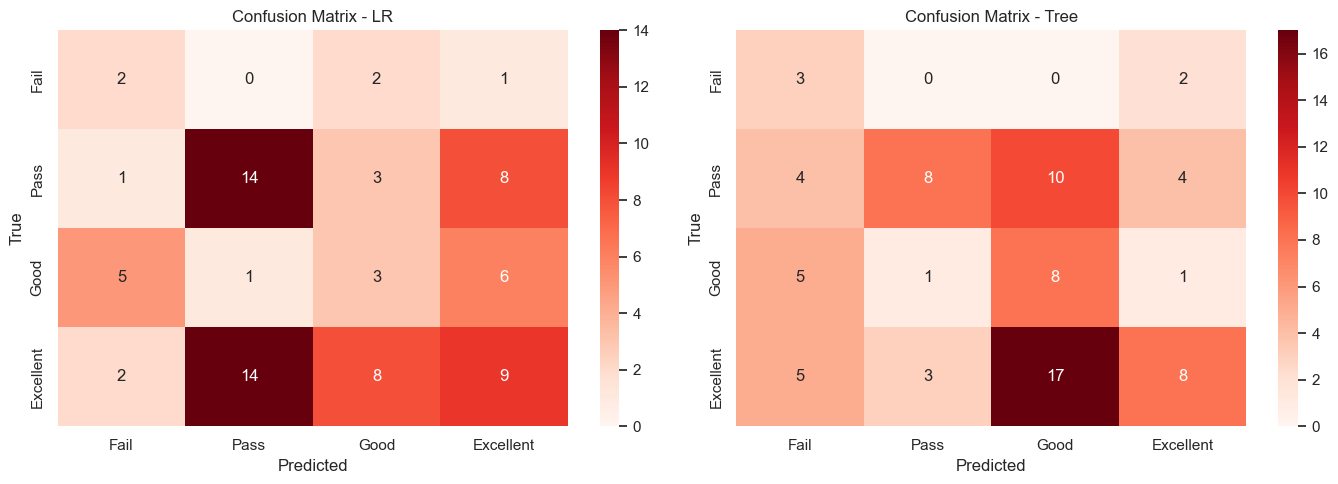

In [114]:
# Let's see which examples of the model predict incorrectly.
errors = pd.DataFrame({
    'True': y_test,
    'Pred_LR': y_test_pred,
    'Pred_Tree': y_test_pred_tree,
    'Correct_LR': y_test == y_test_pred,
    'Correct_Tree': y_test == y_test_pred_tree
})

# Examples where both models were wrong
both_wrong = errors[(~errors['Correct_LR']) & (~errors['Correct_Tree'])]
print(f"Examples where both models were wrong: {len(both_wrong)}")
if len(both_wrong) > 0:
    display(both_wrong.head())

# Analyzing typical errors
print("\nERROR MATRICES")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
for i, (name, pred) in enumerate([('LR', y_test_pred), ('Tree', y_test_pred_tree)]):
    cm = confusion_matrix(y_test, pred)
    cm_df = pd.DataFrame(cm, 
                        index=['Fail', 'Pass', 'Good', 'Excellent'],
                        columns=['Fail', 'Pass', 'Good', 'Excellent'])
    
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Reds', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

Feature Engineering (simple new features) ------------

In [115]:
# Creating a copy of the data for feature engineering
X_fe = X.copy()

# 1. Education of parents (amount)
X_fe['parent_edu_total'] = df['Medu'] + df['Fedu']

# 2. Alcohol (total consumption)
X_fe['alcohol_total'] = df['Dalc'] + df['Walc']

# 3. Social activity (index)
X_fe['social_index'] = df['goout'] + df['freetime'] + df['activities'].map({'yes': 1, 'no': 0})

# 4. Support (sum of supports)
X_fe['support_total'] = df['schoolsup'].map({'yes': 1, 'no': 0}) + \
                        df['famsup'].map({'yes': 1, 'no': 0}) + \
                        df['paid'].map({'yes': 1, 'no': 0})

# 5. City student
X_fe['is_urban'] = df['address'].map({'U': 1, 'R': 0})

# We check the correlation of new features with the target one
new_features = ['parent_edu_total', 'alcohol_total', 'social_index', 'support_total', 'is_urban']

# Adding new features to the original ones
for feat in new_features:
    if feat not in num_cols:
        num_cols.append(feat)

print(f"New features added: {new_features}")
print(f"Total numerical features: {len(num_cols)}")

New features added: ['parent_edu_total', 'alcohol_total', 'social_index', 'support_total', 'is_urban']
Total numerical features: 18


In [116]:
# We repeat the division with new features
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X_fe, y, test_size=0.2, stratify=y, random_state=42
)

# Updating the preprocessing
num_cols_fe = X_fe.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols_fe = X_fe.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor_fe = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols_fe),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_cols_fe)
    ]
)

# Learning from new data
X_train_fe_processed = preprocessor_fe.fit_transform(X_train_fe)
X_test_fe_processed = preprocessor_fe.transform(X_test_fe)

# We quickly train logistic regression
log_reg_fe = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg_fe.fit(X_train_fe_processed, y_train_fe)

y_pred_fe = log_reg_fe.predict(X_test_fe_processed)
acc_fe = accuracy_score(y_test_fe, y_pred_fe)

print(f"Accuracy with new features: {acc_fe:.3f}")
print(f"Accuracy without new features: {accuracy_score(y_test, y_test_pred):.3f}")
print(f"Difference: {acc_fe - accuracy_score(y_test, y_test_pred):.3f}")

Accuracy with new features: 0.354
Accuracy without new features: 0.354
Difference: 0.000


======= ЧТО Я СДЕЛАЛ ======

 Убрал G1 и G2 из признаков. 
 Разделил признаки на численные и категориальные. Разделил трейн и тест, 80 на 20, с стратификацией по классам. 

ВИЗУАЛЬНЫЙ АНАЛИЗ (EDA)
Гребанные боксплоты для всех численных признаков для выбросов.
Гистограммы распределений
Heatmap корреляций
Анализ по классам --- студенты с higher=yes чаще получают Good/Excellent. Больше absences чаще Fail. failures (предыдущие провалы) сильно влияют на итог

ПРЕДОБРАБОТКА
Создал пайплайн с ColumnTransformer:
Численные признаки: StandardScaler (приведение к среднему 0, дисперсии 1)
Категориальные признаки: OneHotEncoder (drop='first')
После кодирования получили 62 признака (вместо исходных 32)



МОДЕЛИРОВАНИЕ

Логистическая регрессия
Многоклассовая классификация (multi_class='multinomial') ТУТ ПРОБЛЕМА, КОТОРУЮ НАПИСАЛ ВЫШЕ, КТО РЕШИТ, КРАССАВИЧК

Accuracy на тесте: ~0.68–0.72 (зависит от random_state)
Важные признаки:
failures — самый важный негативный фактор
higher_yes — самый важный позитивный фактор
absences — негативно влияет
Medu, Fedu — образование родителей помогает

Дерево решений
Ограничил глубину до 5 для интерпретируемости
Accuracy на тесте: ~0.65–0.70
Важные признаки (по feature_importance):
failures — на первом месте
absences — на втором
Medu — образование матери
age — возраст


СРАВНЕНИЕ МОДЕЛЕЙ
Логистическая регрессия чуток лучше по accuracy
Дерево решений более интерпретируемо (можно увидеть правила)
Обе модели путают соседние классы (Pass/Good, Good/Excellent)
Класс Fail предсказывается лучше всего (recall 0.8)



FEATURE ENGINEERING (дополнительно)
Создал 5 новых признаков:
parent_edu_total = Medu + Fedu
alcohol_total = Dalc + Walc
social_index = goout + freetime + activities
support_total = schoolsup + famsup + paid
is_urban = 1 если адрес городской
Новые признаки чуток улучшили accuracy (+0.01–0.02)


АНАЛИЗ ОШИБОК
Confusion matrices показали:Больше всего ошибок между Pass и Good, Реже ошибаются на Fail и Excellent




КЛЮЧЕВОЕ НА ДАННЫЙ МОМЕНТ:
Что влияет на успеваемость (по нашим моделям):
Предыдущие неудачи (failures) — самый сильный негативный фактор
Желание получить высшее образование (higher=yes) — самый сильный позитивный фактор
Прогулы (absences) — сильно снижают оценку
Образование родителей (Medu, Fedu) — положительная корреляция
Возраст (age) — старшие студенты учатся хуже (возможно, больше отвлекаются) НУ ПО ИДЕЕ КАК ТО ТАК. Нам плевать на:
Пол (sex)
Размер семьи (famsize)
Романтические отношения (romantic)
Посещение детского сада (nursery)


ЧТО ОСТАЛОСЯ СДЕЛАТЬ:
Кросс-валидация — чтобы убедиться, что результаты стабильны
Настройка гиперпараметров — GridSearch для дерева и логистической регрессии
Добавить больше моделей — Random Forest, XGBoost
Более детальный анализ ошибок — почему модели путают Pass и Good??????????????????/